<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/Xception_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
sets = ['train', 'test', 'validation']
counts = dict()

for s in sets:
  root = '/content/drive/My Drive/tomato'.format(s)
  for d in os.listdir(root):
    directory = '{}/{}'.format(root, d)
    number_of_files = len(os.listdir(directory))
    counts.setdefault(d, 0)
    counts[d] += number_of_files

for f, c in counts.items():
  print(f, '->' ,c)

valid -> 30
train -> 30


In [0]:
get_ipython().system_raw("unrar x datasets.rar")

In [0]:
import keras
import os, shutil
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
%matplotlib inline

train_dir = '/content/drive/My Drive/tomato2/train'
test_dir = '/content/drive/My Drive/tomato2/valid'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10.,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=16
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=16
)

Using TensorFlow backend.


Found 3630 images belonging to 2 classes.
Found 905 images belonging to 2 classes.


In [0]:
from keras.applications.xception import Xception

conv_base = Xception(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))
                 
conv_base.summary()













83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________

In [0]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 47,077,418
Trainable params: 47,022,890
Non-trainable params: 54,528
_________________________________________________________________


In [0]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=1, 
                              validation_data=test_generator,
                              validation_steps=25)

This is the number of trainable weights before freezing the conv base: 4


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
50/50 [==============================] - 301s 6s/step - loss: 1.0999 - categorical_accuracy: 0.7280 - val_loss: 0.3437 - val_categorical_accuracy: 0.8375


In [0]:
from keras.models import load_model
try:
    model = load_model('checkpoints\\resnet.h5')
except:
    pass

In [0]:
conv_base.trainable = True

model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=25, 
                              epochs=50, 
                              validation_data=test_generator, 
                              callbacks=[
                                  keras.callbacks.ModelCheckpoint('checkpoints\\rsnet.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1),
                                  keras.callbacks.TensorBoard(log_dir='logs\\inception', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None),
                              ],
                              validation_steps=25)

Epoch 1/50
25/25 [==============================] - 256s 10s/step - loss: 0.2754 - categorical_accuracy: 0.9050 - val_loss: 0.1674 - val_categorical_accuracy: 0.9250

Epoch 2/50
25/25 [==============================] - 253s 10s/step - loss: 0.2044 - categorical_accuracy: 0.9275 - val_loss: 0.2022 - val_categorical_accuracy: 0.9175
Epoch 3/50
25/25 [==============================] - 240s 10s/step - loss: 0.1967 - categorical_accuracy: 0.9325 - val_loss: 0.1378 - val_categorical_accuracy: 0.9440
Epoch 4/50
25/25 [==============================] - 242s 10s/step - loss: 0.1799 - categorical_accuracy: 0.9300 - val_loss: 0.1404 - val_categorical_accuracy: 0.9400
Epoch 5/50
25/25 [==============================] - 241s 10s/step - loss: 0.1323 - categorical_accuracy: 0.9575 - val_loss: 0.1552 - val_categorical_accuracy: 0.9313
Epoch 6/50
25/25 [==============================] - 242s 10s/step - loss: 0.1510 - categorical_accuracy: 0.9500 - val_loss: 0.0928 - val_categorical_accuracy: 0.9625
Epo

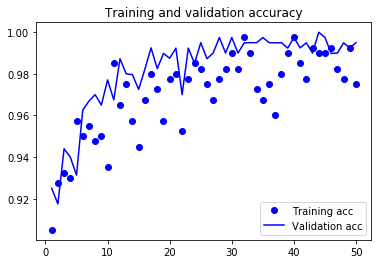

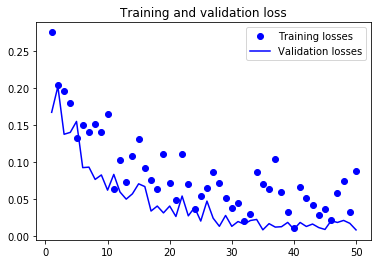

In [0]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()